In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import time

In [2]:
# Load the data
df = pd.read_csv("new_unicorn_data_updated.csv")

In [3]:
df.head()

,Company,Date Joined,Industry,Country,City,Continent,Year Founded,Funding,Funding_Numeric ($B),Valuation (March) ($B),Select Investors (March),Valuation (November) ($B),Select Investors (November),Years to Unicorn,Most Recent Valuation
0,SpaceX,2012-12-01,Other,United States,Hawthorne,North America,2002,$7B,7.000,100,"Founders Fund, Draper Fisher Jurvetson, Rothen...",127.0,"Founders Fund, Draper Fisher Jurvetson, Rothen...",10,127.0
1,SHEIN,2018-07-03,E-commerce And Direct-to-consumer,China,Shenzhen,Asia,2008,$2B,2.000,100,"Tiger Global Management, Sequoia Capital China...",100.0,"Tiger Global Management, Sequoia Capital China...",10,100.0
2,Stripe,2014-01-23,Fintech,United States,San Francisco,North America,2010,$2B,2.000,95,"Khosla Ventures, LowercaseCapital, capitalG",95.0,"Khosla Ventures, LowercaseCapital, capitalG",4,95.0
3,Klarna,2011-12-12,Fintech,Sweden,Stockholm,Europe,2005,$4B,4.000,46,"Institutional Venture Partners, Sequoia Capita...",6.7,"Institutional Venture Partners, Sequoia Capita...",6,6.7
4,Canva,2018-01-08,Internet Software And Services,Australia,Surry Hills,Oceania,2012,$572M,0.572,40,"Sequoia Capital China, Blackbird Ventures, Mat...",40.0,"Sequoia Capital China, Blackbird Ventures, Mat...",6,40.0


In [4]:
# Encode 'Industry'
industry_le = LabelEncoder()
df['Encoded_Industry'] = industry_le.fit_transform(df['Industry'])

# Encode 'Country'
country_le = LabelEncoder()
df['Encoded_Country'] = country_le.fit_transform(df['Country'])

# Print the mapping dictionaries for 'Industry' and 'Country'
industry_mapping_dict = dict(zip(df['Encoded_Industry'].unique(), industry_le.inverse_transform(df['Encoded_Industry'].unique())))
sorted_industry_mapping_dict = sorted(industry_mapping_dict.items(), key=lambda x: x[0])

country_mapping_dict = dict(zip(df['Encoded_Country'].unique(), country_le.inverse_transform(df['Encoded_Country'].unique())))
sorted_country_mapping_dict = sorted(country_mapping_dict.items(), key=lambda x: x[0])

print("Encoded_Industry Mapping:")
for key, value in sorted_industry_mapping_dict:
    print(f"{key} = {value}")

print("\nEncoded_Country Mapping:")
for key, value in sorted_country_mapping_dict:
    print(f"{key} = {value}")

Encoded_Industry Mapping:
0 = Artificial Intelligence
1 = Auto And Transportation
2 = Consumer And Retail
3 = Cybersecurity
4 = Data Management And Analytics
5 = E-commerce And Direct-to-consumer
6 = Edtech
7 = Fintech
8 = Hardware
9 = Health
10 = Internet Software And Services
11 = Mobile And Telecommunications
12 = Other
13 = Supply Chain, Logistics, And Delivery
14 = Travel

Encoded_Country Mapping:
0 = Argentina
1 = Australia
2 = Austria
3 = Bahamas
4 = Belgium
5 = Bermuda
6 = Brazil
7 = Canada
8 = Chile
9 = China
10 = Colombia
11 = Croatia
12 = Denmark
13 = Estonia
14 = Finland
15 = France
16 = Germany
17 = Hong Kong
18 = India
19 = Indonesia
20 = Ireland
21 = Israel
22 = Italy
23 = Japan
24 = Lithuania
25 = Luxembourg
26 = Malaysia
27 = Mexico
28 = Netherlands
29 = Nigeria
30 = Norway
31 = Philippines
32 = Senegal
33 = Singapore
34 = South Africa
35 = South Korea
36 = Spain
37 = Sweden
38 = Switzerland
39 = Thailand
40 = Turkey
41 = United Arab Emirates
42 = United Kingdom
43 = U

In [5]:
# CompanyAge
df["CompanyAge"] = 2023 - df["Year Founded"]

In [6]:
df["CompanyAge"]

0       21
1       15
2       13
3       18
4       11
        ..
1034    11
1035     8
1036     5
1037    18
1038     9
Name: CompanyAge, Length: 1039, dtype: int64

In [7]:
# Select features
features = ['Encoded_Industry', 'Encoded_Country', 'CompanyAge', 'Funding_Numeric ($B)']

In [8]:
X = df[features]
X

,Encoded_Industry,Encoded_Country,CompanyAge,Funding_Numeric ($B)
0,12,43,21,7.000
1,5,9,15,2.000
2,7,43,13,2.000
3,7,37,18,4.000
4,10,1,11,0.572
...,...,...,...,...
1034,5,9,11,0.379
1035,5,9,8,0.990
1036,2,9,5,0.080
1037,7,42,18,0.792


In [9]:
Y = df['Years to Unicorn']
Y

0       10
1       10
2        4
3        6
4        6
        ..
1034     5
1035     2
1036     3
1037    16
1038     6
Name: Years to Unicorn, Length: 1039, dtype: int64

In [10]:
# Check the dimensions of X and Y
print("Shape of X:", X.shape)
print("Shape of Y:", Y.shape)

Shape of X: (1039, 4)
Shape of Y: (1039,)


In [11]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [12]:
# Create and train the linear regression model
start_time = time.time()  # Record the start time
linear_reg = LinearRegression()
linear_reg.fit(X_train, Y_train)
end_time = time.time()  # Record the end time

In [13]:
# Make predictions
Y_pred = linear_reg.predict(X_test)

In [14]:
# Calculate the training time
training_time = end_time - start_time
print(f'Training Time: {training_time} seconds')

Training Time: 0.015079021453857422 seconds


In [15]:
# Evaluate the model
mse = mean_squared_error(Y_test, Y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 3.1185817890072416


In [16]:
# Root Mean Squared Error
rmse = mean_squared_error(Y_test, Y_pred)
print(f'Root Mean Squared Error: {np.sqrt(rmse)}')

Root Mean Squared Error: 1.7659506757005536


In [17]:
from sklearn.metrics import r2_score
r2_score(Y_test, Y_pred)

0.8300809878109144

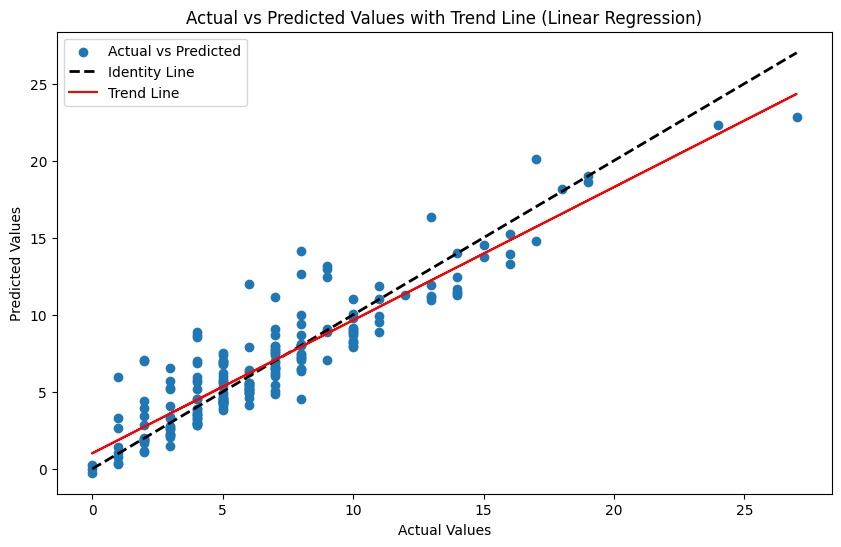

In [18]:
# Plot the actual vs predicted values with the trend line
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_pred, label='Actual vs Predicted')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2, label='Identity Line')
plt.title('Actual vs Predicted Values with Trend Line (Linear Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Add a trend line (line of best fit)
z = np.polyfit(Y_test, Y_pred, 1)
p = np.poly1d(z)
plt.plot(Y_test, p(Y_test), color='red', label='Trend Line')

plt.legend()
plt.show()

In [19]:
Y.unique()

array([10,  4,  6,  7,  2,  3, 27,  9, 11,  5,  1, 18,  8, 17, 12, 14, 25,
       22, 16, 15, 19, 26, 13,  0, 98, 20, 21, 24, 37, -3, 28])

In [20]:
df[df['Years to Unicorn'] == 10]

,Company,Date Joined,Industry,Country,City,Continent,Year Founded,Funding,Funding_Numeric ($B),Valuation (March) ($B),Select Investors (March),Valuation (November) ($B),Select Investors (November),Years to Unicorn,Most Recent Valuation,Encoded_Industry,Encoded_Country,CompanyAge
0,SpaceX,2012-12-01,Other,United States,Hawthorne,North America,2002,$7B,7.000,100,"Founders Fund, Draper Fisher Jurvetson, Rothen...",127.0,"Founders Fund, Draper Fisher Jurvetson, Rothen...",10,127.0,12,43,21
1,SHEIN,2018-07-03,E-commerce And Direct-to-consumer,China,Shenzhen,Asia,2008,$2B,2.000,100,"Tiger Global Management, Sequoia Capital China...",100.0,"Tiger Global Management, Sequoia Capital China...",10,100.0,5,9,15
12,Fanatics,2012-06-06,E-commerce And Direct-to-consumer,United States,Jacksonville,North America,2002,$4B,4.000,27,"SoftBank Group, Andreessen Horowitz, Temasek H...",27.0,"SoftBank Group, Andreessen Horowitz, Temasek H...",10,27.0,5,43,21
22,Blockchain.com,2021-02-17,Fintech,United Kingdom,London,Europe,2011,$490M,0.490,14,"Lightspeed Venture Partners, Google Ventures, ...",14.0,"Lightspeed Venture Partners, Google Ventures, ...",10,14.0,7,42,12
26,Grammarly,2019-10-10,Internet Software And Services,United States,San Francisco,North America,2009,$400M,0.400,13,"General Catalyst, Institutional Venture Partne...",13.0,"General Catalyst, Institutional Venture Partne...",10,13.0,10,43,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963,Pet Circle,2021-12-06,E-commerce And Direct-to-consumer,Australia,Alexandria,Oceania,2011,$125M,0.125,1,"Prysm Capital, Baillie Gifford & Co., TDM Grow...",1.0,"Prysm Capital, Baillie Gifford & Co., TDM Grow...",10,1.0,5,1,12
964,PicsArt,2021-08-26,Mobile And Telecommunications,United States,San Francisco,North America,2011,$195M,0.195,1,"Sequoia Capital, DCM Ventures, Insight Partners",1.0,"Sequoia Capital, DCM Ventures, Insight Partners",10,1.0,11,43,12
984,Sentry,2021-02-18,Other,United States,San Francisco,North America,2011,$127M,0.127,1,"New Enterprise Associates, Accel, Bond",3.0,"New Enterprise Associates, Accel, Bond",10,3.0,12,43,12
990,Sift,2021-04-22,Artificial Intelligence,United States,San Francisco,North America,2011,$157M,0.157,1,"Union Square Ventures, Insight Partners, Spark...",1.0,"Union Square Ventures, Insight Partners, Spark...",10,1.0,0,43,12
